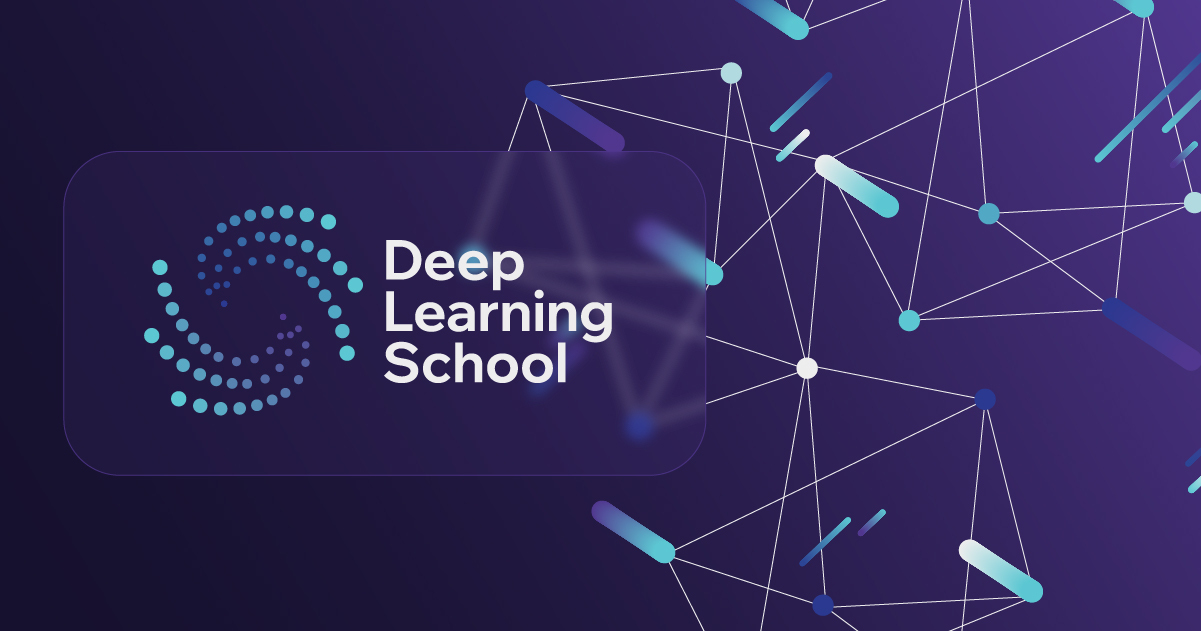

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

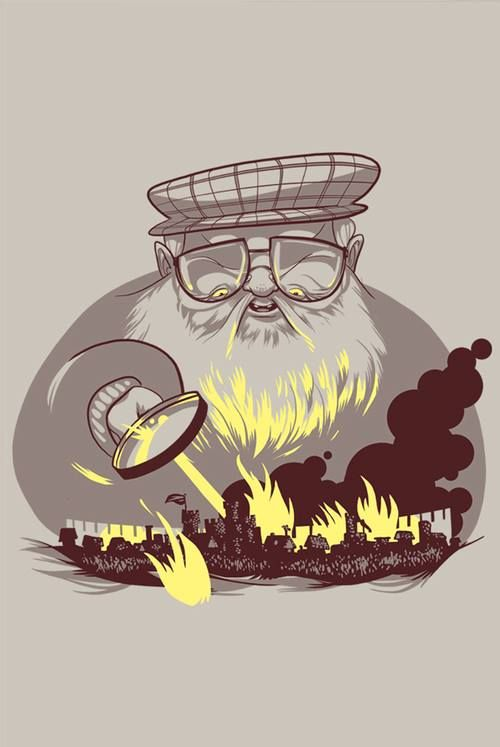

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [205]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [207]:
data = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')

Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [208]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [209]:
data.describe(include = [int, float]).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [210]:
data.isna().sum(axis=0)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

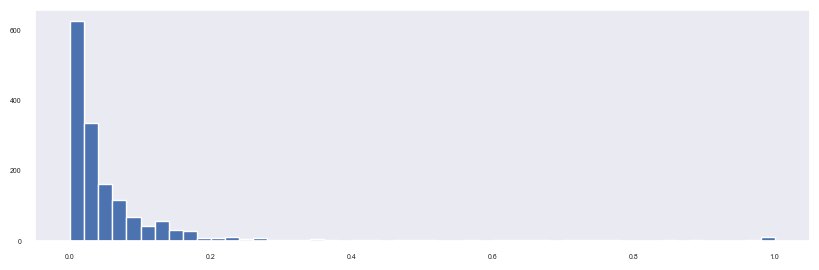

In [211]:
data['popularity'].hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False);

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


In [212]:
data['popularity'] = np.log10(data["popularity"]*100+1)

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

numDeadRelations
False    1488
True       69
Name: count, dtype: int64

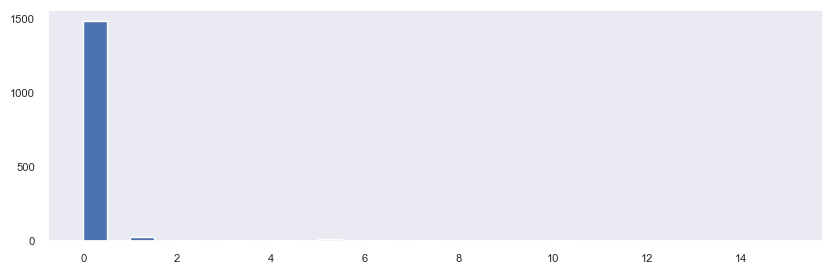

In [213]:
#Посмотрела на распределение и на кол-во тех людей, у кого были отношения с мертвыми,а у кого нет.
data['numDeadRelations'].hist(figsize=(10, 3), bins=30, xlabelsize=8, ylabelsize=8, grid=False)
(data['numDeadRelations'] > 0).value_counts()

In [214]:
#создала новый признак
data['boolDeadRelations'] = data['numDeadRelations'] > 0
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              717 non-null    object 
 2   male               1557 non-null   int64  
 3   culture            488 non-null    object 
 4   dateOfBirth        279 non-null    float64
 5   mother             18 non-null     object 
 6   father             22 non-null     object 
 7   heir               21 non-null     object 
 8   house              1176 non-null   object 
 9   spouse             200 non-null    object 
 10  book1              1557 non-null   int64  
 11  book2              1557 non-null   int64  
 12  book3              1557 non-null   int64  
 13  book4              1557 non-null   int64  
 14  book5              1557 non-null   int64  
 15  isAliveMother      18 non-null     float64
 16  isAliveFather      22 non-nul

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [215]:
data['age_value'] = [x if not np.isnan(x) else 0 for x in data['age']]
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [216]:
data['culture'].value_counts(dropna = False)

culture
NaN                        1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Stormlands                    4
Summer Isles                  4
Astapori                      4
Westeros                      3
Dornishmen                    3
Ironmen                       3
Northern mountain clans       3
Westermen                     3
Lysene                        2
westermen                     2
Meereenese                    2
Myrish                        2
Crannogmen                    2


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [217]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [218]:
#Довольно просто инвертировать словарь, где ключу соответствует одно значение
#В нашем случае ключу соответствует список значений.
#Ниже показан пример, как можно инвертировать такой словарь

d = {'A': ['a1', 'a2', 'a3'],
     'B': ['b1', 'b2', 'b3', 'b4']}

d_inverted = {}
for k in d.keys():
  for v in d[k]:
      d_inverted.update({v:k})

d_inverted

{'a1': 'A', 'a2': 'A', 'a3': 'A', 'b1': 'B', 'b2': 'B', 'b3': 'B', 'b4': 'B'}

In [219]:
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
      cultures_grouped_inverted.update({v:k})

cultures_grouped_inverted

{'valyrian': 'Old Nations',
 'first men': 'Old Nations',
 'andal': 'Old Nations',
 'andals': 'Old Nations',
 'rhoynar': 'Old Nations',
 'northmen': 'the North',
 'northern mountain clans': 'the North',
 'crannogmen': 'the North',
 'ironborn': 'the Iron Islands',
 'ironmen': 'the Iron Islands',
 'valemen': 'the Mountain and the Vale',
 'vale': 'the Mountain and the Vale',
 'vale mountain clans': 'the Mountain and the Vale',
 'sistermen': 'the Mountain and the Vale',
 'riverlands': 'the Isles and Rivers',
 'rivermen': 'the Isles and Rivers',
 'westerman': 'the Rock',
 'westermen': 'the Rock',
 'westerlands': 'the Rock',
 'stormlander': 'the Stormlands',
 'stormlands': 'the Stormlands',
 'reach': 'the Reach',
 'reachmen': 'the Reach',
 'the reach': 'the Reach',
 'dornish': 'Dorne',
 'dornishmen': 'Dorne',
 'dorne': 'Dorne',
 'astapor': 'Essos Nations',
 'astapori': 'Essos Nations',
 'braavosi': 'Essos Nations',
 'braavos': 'Essos Nations',
 'tyroshi': 'Essos Nations',
 'lysene': 'Essos Na

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [220]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [221]:
data['culture_grouped'] = data['culture_grouped'].fillna('culture_no_data')

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [222]:
# Количество уникальнх значений в каждом столбце
data.nunique()

name                 1557
title                 195
male                    2
culture                51
dateOfBirth           105
mother                 16
father                 19
heir                   20
house                 315
spouse                186
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    72
numDeadRelations       14
popularity            117
isAlive                 2
boolDeadRelations       2
age_value              72
age_no_data             2
culture_grouped        12
dtype: int64

In [223]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = [int, float]).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.000000,2
dateOfBirth,279.0,-25.0,299.000000,105
book1,1557.0,0.0,1.000000,2
book2,1557.0,0.0,1.000000,2
book3,1557.0,0.0,1.000000,2
book4,1557.0,0.0,1.000000,2
book5,1557.0,0.0,1.000000,2
isAliveMother,18.0,0.0,1.000000,2
isAliveFather,22.0,0.0,1.000000,2
isAliveHeir,21.0,0.0,1.000000,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [224]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

# data.groupby('НАЗВАНИЕ ПРИЗНАКА', dropna = False)['isAlive'].mean()
# pd.pivot_table(data = data, values = 'isAlive', index = 'НАЗВАНИЕ ПРИЗНАКА', aggfunc=['mean', 'count'], dropna=False)

data.groupby('isAliveSpouse', dropna=False)['isAlive'].mean()

isAliveSpouse
0.0    0.619048
1.0    0.753165
NaN    0.786293
Name: isAlive, dtype: float64

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [225]:
#Удалила признак, т.к не имена не связаны с выживаемостью.
data.drop(columns=["name"], inplace=True)

In [226]:
#заполнила наны в признаке
data['title'] = data['title'].fillna('No_title')

#тк статусов в столбце title очень много(целых 196), я использую Frequency Encoding
title_freq = data['title'].value_counts().to_dict()
data['title_encoded'] = data['title'].map(title_freq)

#после создание нового столбца, удаляю title, чтобы избежать дублирования
data.drop(columns=["title"], inplace=True)

#в этих столбаца безумно много NaN
#сделала бинарными признаками, т.к. столбцы имеют только имена.
data['mother'].value_counts(dropna = False)
data['mother'] = data['mother'].notna().astype(int)
data['father'] = data['father'].notna().astype(int)
data['heir'] = data['heir'].notna().astype(int)
data['spouse'] = data['spouse'].notna().astype(int)

In [227]:
house_freq = data['house'].value_counts().to_dict()
data['house_encoded'] = data['house'].map(house_freq)
data['house_encoded'] = data['house_encoded'].fillna(0)

#удалила признак house
data.drop(columns=["house"], inplace=True)

In [228]:
#корреляция есть, значит признак может повлиять на результат
data[['house_encoded', 'isAlive']].corr()

,house_encoded,isAlive
house_encoded,1.000000,-0.081653
isAlive,-0.081653,1.000000


In [229]:
#удаляю признак culture, т.к. уже обработали его, создав culture_grouped
data.drop(columns=["culture"], inplace=True)

In [230]:
data.describe(include = 'object').T

,count,unique,top,freq
culture_grouped,1557,12,culture_no_data,1069


In [231]:
#кодирую признак culture_grouped с помощью Frequency Encoding
culture_freq = data['culture_grouped'].value_counts().to_dict()
data['culture_encoded'] = data['culture_grouped'].map(culture_freq)

data.drop(columns=["culture_grouped"], inplace=True)

In [232]:
#смотрю на корреляцию
data[['culture_encoded', 'isAlive']].corr()

,culture_encoded,isAlive
culture_encoded,1.000000,0.013389
isAlive,0.013389,1.000000


Корреляция между culture_encoded и isAlive очень маленькая, можно в целом и удалить, но я оставлю.Может быть модель найдет нелинейную зависимость.

In [233]:
data['male'].isnull().sum()
data[['male', 'isAlive']].corr()
#корреляция говорит о том, что у мужчин выживаемость меньше, этот признак информативен для целелой переменной

,male,isAlive
male,1.00000,-0.14829
isAlive,-0.14829,1.00000


In [234]:
data['dateOfBirth'].isnull().sum()
#очень много пустых
#сделала как из примера выше, разделила на 2 столбца
# -если дата есть, то оставляю в date_value ее, а где нет ставлю 0. В date_no_data ставлю 1 там, где даты нет.
data['date_value'] = [x if not np.isnan(x) else 0 for x in data['dateOfBirth']] 
data['date_no_data'] = [1 if np.isnan(x) else 0 for x in data['dateOfBirth']]

#Удалила столбец
data.drop(columns = ['dateOfBirth'], inplace = True)

In [235]:
data[['date_value', 'date_no_data',  'isAlive']].corr()
#корреляция показала, что признак date_no_data влияет на выживаемость больше, чем date_value, поэтому удаляю этот признак.

,date_value,date_no_data,isAlive
date_value,1.000000,-0.964465,-0.027024
date_no_data,-0.964465,1.000000,0.113629
isAlive,-0.027024,0.113629,1.000000


In [236]:
data.drop(columns = ['date_value'], inplace = True)

In [237]:
#теперь посмотрю корреляцию между mother,father,heir,spouse
data[['mother','father','heir','spouse', 'isAlive']].corr()

,mother,father,heir,spouse,isAlive
mother,1.000000,0.903358,0.872830,-0.041519,-0.159302
father,0.903358,1.000000,0.835163,-0.045960,-0.145771
heir,0.872830,0.835163,1.000000,-0.044889,-0.152124
spouse,-0.041519,-0.045960,-0.044889,1.000000,-0.049381
isAlive,-0.159302,-0.145771,-0.152124,-0.049381,1.000000


In [238]:
#признаки все, кроме spouse коррелируют почти одинаково, а spouse меньше всего, поэтому признаки обьединю в один признак
data['has_family'] = data[['mother', 'father', 'heir', 'spouse']].sum(axis=1)

#удаляю ненужные
data.drop(columns=['mother', 'father', 'heir', 'spouse'], inplace=True)

In [239]:
#Обьединила в один признак, который показывает сколько о скольких родственниках известно(0-4)
data['known_family'] = data[['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']].notna().sum(axis=1)

#и добавила новый признак, который показывает сколько из этих изветных родственников живы(Nan - мертвые)
data['alive_family'] = data[['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']].fillna(0).sum(axis=1)

#удаляю ненужные столбцы
data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

In [240]:
#Удалила признак age, т.к. мы его уже обработали и разделили ранее.
data.drop(columns=['age'], inplace=True)

In [241]:
#перевела в бинарный признак
data['DeadRelations'] = data['boolDeadRelations'].astype(int)

#удаляю столбец, который мы упростили
data.drop(columns=['numDeadRelations'], inplace=True)
data.drop(columns=['boolDeadRelations'], inplace=True)

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1557 non-null   int64  
 1   book1            1557 non-null   int64  
 2   book2            1557 non-null   int64  
 3   book3            1557 non-null   int64  
 4   book4            1557 non-null   int64  
 5   book5            1557 non-null   int64  
 6   isMarried        1557 non-null   int64  
 7   isNoble          1557 non-null   int64  
 8   popularity       1557 non-null   float64
 9   isAlive          1557 non-null   int64  
 10  age_value        1557 non-null   float64
 11  age_no_data      1557 non-null   int64  
 12  title_encoded    1557 non-null   int64  
 13  house_encoded    1557 non-null   float64
 14  culture_encoded  1557 non-null   int64  
 15  date_no_data     1557 non-null   int64  
 16  has_family       1557 non-null   int64  
 17  known_family     15

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

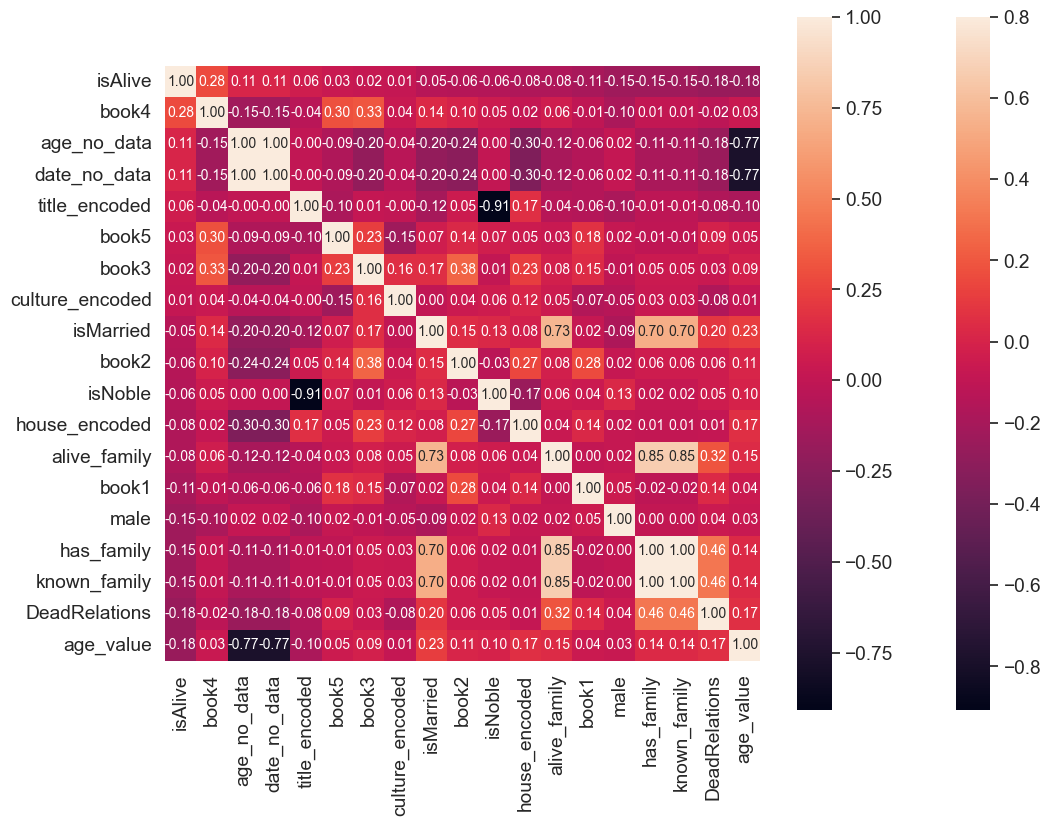

In [243]:
#матрица корреляции, где мы модем посмотреть, как коррелируют между собой признаки
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# correlation matrix
k = 19 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [244]:
data.corr()['isAlive'].sort_values(ascending=False)

isAlive            1.000000
book4              0.284014
date_no_data       0.113629
age_no_data        0.113629
title_encoded      0.063066
book5              0.032531
book3              0.018427
culture_encoded    0.013389
isMarried         -0.049381
book2             -0.055998
isNoble           -0.060572
house_encoded     -0.081653
alive_family      -0.084637
book1             -0.112468
male              -0.148290
has_family        -0.149906
known_family      -0.149906
DeadRelations     -0.178177
age_value         -0.181938
popularity        -0.242497
Name: isAlive, dtype: float64

In [245]:
data.head(10)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,isAlive,age_value,age_no_data,title_encoded,house_encoded,culture_encoded,date_no_data,has_family,known_family,alive_family,DeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1.789123,0,0.0,1,840,0.0,1069,1,3,3,1.0,1
2,1,1,1,1,1,1,1,1,1.957282,1,97.0,0,1,89.0,10,0,1,1,1.0,1
3,1,0,0,0,1,0,0,1,1.443355,1,0.0,1,306,7.0,1069,1,0,0,0.0,0
4,0,0,0,0,0,0,1,1,1.287682,0,23.0,0,3,11.0,1069,0,1,1,0.0,0
5,0,0,0,0,1,0,1,1,0.728177,1,29.0,0,1,2.0,21,0,1,1,1.0,0
6,1,0,0,0,0,0,0,0,2.004321,1,0.0,1,840,0.0,1069,1,3,3,3.0,1
7,1,0,0,0,0,0,1,1,1.644870,0,26.0,0,2,40.0,32,0,1,1,1.0,0
8,1,0,0,0,0,0,0,0,1.838175,0,0.0,1,840,0.0,1069,1,3,3,3.0,1
9,1,0,0,1,0,0,0,1,0.222429,0,0.0,1,306,0.0,1069,1,0,0,0.0,0


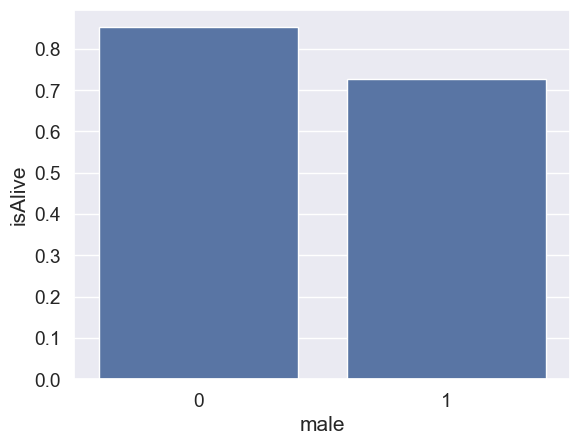

In [246]:
sns.barplot(x='male', y='isAlive', data=data, errorbar=None)
plt.show()

- мужчины меньше выжили, чем женщини
- Вывод по house_encoded:
    Принадлежность к определенному дому сильно влияет на выживаемость персонажа. Персонажи из "безопасных" домов имеют значительно выше шансы выжить, чем из "опасных" домов.



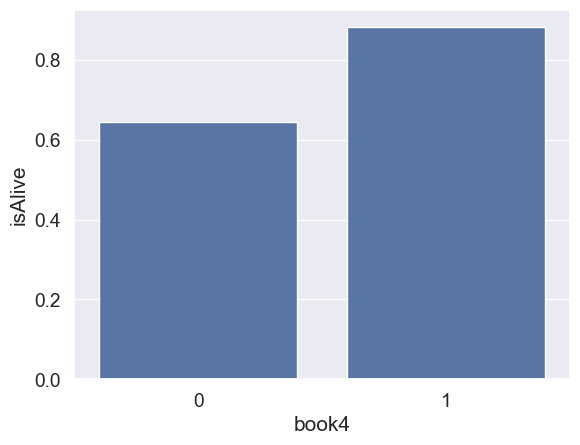

In [247]:
sns.barplot(x='book4', y='isAlive', data=data, errorbar=None)
plt.show()

-процент выживших людей, которые из 4 книги, больше, чем все остальные, прикольно.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [248]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [273]:
# ИСПРАВЛЕНИЯ ОШИБОК В ОБРАБОТКЕ ТЕСТОВЫХ ДАННЫХ

# 1. Добавляем логарифмическое преобразование для popularity (как в обучающем наборе)
data_test['popularity'] = np.log10(data_test["popularity"]*100+1)

# 2. Исправляем кодирование признаков - используем словари из обучающего набора
# Для title используем тот же словарь, что и в обучающем наборе
 # для неизвестных значений

# Для house используем тот же словарь, что и в обучающем наборе  



In [252]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

In [274]:
# ИСПРАВЛЕННОЕ ПРЕДСКАЗАНИЕ
# Используем .values для консистентности с обучением модели (убираем предупреждение)
preds = model.predict(data_test.values)
submission['isAlive'] = preds

print("Предсказания выполнены успешно!")
print(f"Количество предсказаний: {len(preds)}")
print(f"Уникальные значения предсказаний: {np.unique(preds)}")
print(f"Распределение предсказаний:")
print(f"  - Выжившие (1): {np.sum(preds == 1)}")
print(f"  - Погибшие (0): {np.sum(preds == 0)}")


Предсказания выполнены успешно!
Количество предсказаний: 389
Уникальные значения предсказаний: [0 1]
Распределение предсказаний:
  - Выжившие (1): 307
  - Погибшие (0): 82


In [275]:
# СОХРАНЕНИЕ ИСПРАВЛЕННОГО РЕЗУЛЬТАТА
submission.to_csv("corrected_submission.csv", index=False)
print("Исправленный файл submission сохранен как 'corrected_submission.csv'")
print(f"Размер файла: {submission.shape}")
print("\nПервые 10 строк результата:")
print(submission.head(10))


Исправленный файл submission сохранен как 'corrected_submission.csv'
Размер файла: (389, 1)

Первые 10 строк результата:
      isAlive
S.No         
1558        0
1559        1
1560        1
1561        1
1562        1
1563        1
1564        1
1565        1
1566        1
1567        1


В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [255]:
# Шаг 1. создание модели
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, 40],
    'min_samples_split': [5, 10, 12, 14],
    'min_samples_leaf': [6, 8],
    'max_features': ['sqrt']
}
gs = GSCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
gs.fit(X_train, y_train)
rf = gs.best_estimator_

# Шаг 2. обучение модели
param_grid = {
    'max_depth' : [i for i in range(2,12,2)], 
    'min_samples_split': [i for i in range(2,20,3)],
    'min_samples_leaf': [i for i in range(8,15,2)],
    'criterion': ['entropy']
}
gs = GSCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose = 2) 
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

dt = gs.best_estimator_

# Шаг 3. Предсказание на тестовых данных
preds_rf = rf.predict(X_val)
preds_dt = dt.predict(X_val)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 120 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 14, 'min_samples_split': 8} 0.8224899598393575


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [256]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [257]:
# Шаг 3. Предсказание на тестовых данных

# ваш код здесь

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_rf = accuracy_score(y_val, preds_rf)
accuracy_dt = accuracy_score(y_val, preds_dt)
print("Accuracy_rf : %.4f" % accuracy_rf)
print("Accuracy_dt : %.4f" % accuracy_dt)

Accuracy_rf : 0.8109
Accuracy_dt : 0.8013


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

In [258]:
model = RandomForestClassifier(
    criterion = 'entropy', 
    max_depth = 4, 
    min_samples_leaf = 14, 
    min_samples_split = 5
).fit(X, y)

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [259]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col = "S.No")

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [260]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


In [261]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

In [262]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

In [263]:
data_test.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033


### Файл `submission.csv`

In [264]:
cat_cols = data_test.select_dtypes(include='object').columns
data_test.select_dtypes(include='object').info()

#Удалила признак, т.к не имена не связаны с выживаемостью.
data_test.drop(columns=["name"], inplace=True)
#заполнила наны в признаке
data_test['title'] = data_test['title'].fillna('No_title')

#тк статусов в столбце title очень много(целых 196), я использую Frequency Encoding
title_freq = data_test['title'].value_counts().to_dict()
data_test['title_encoded'] = data_test['title'].map(title_freq)

#после создание нового столбца, удаляю title, чтобы избежать дублирования
data_test.drop(columns=["title"], inplace=True)

#в этих столбаца безумно много NaN
#сделала бинарными признаками, т.к. столбцы имеют только имена.
data_test['mother'].value_counts(dropna = False)
data_test['mother'] = data_test['mother'].notna().astype(int)
data_test['father'] = data_test['father'].notna().astype(int)
data_test['heir'] = data_test['heir'].notna().astype(int)
data_test['spouse'] = data_test['spouse'].notna().astype(int)

#заменила названия домов на среднюю выживаемомтсь в каждом доме
house_freq = data_test['house'].value_counts().to_dict()
data_test['house_encoded'] = data_test['house'].map(house_freq)
data_test['house_encoded'] = data_test['house_encoded'].fillna(0)

#удалила признак house
data_test.drop(columns=["house"], inplace=True)

data_test['culture_grouped'] = data_test['culture'].str.lower().map(cultures_grouped_inverted)
data_test['culture_grouped'] = data_test['culture_grouped'].fillna('culture_no_data')

#удаляю признак culture, т.к. уже обработали его, создав culture_grouped
data_test.drop(columns=["culture"], inplace=True)

#кодирую признак culture_grouped с помощью Frequency Encoding
culture_freq = data_test['culture_grouped'].value_counts().to_dict()
data_test['culture_encoded'] = data_test['culture_grouped'].map(culture_freq)

data_test.drop(columns=['culture_grouped'], inplace=True)

data_test['male'].isnull().sum()

data_test['dateOfBirth'].isnull().sum()
#очень много пустых
#сделала как из примера выше, разделила на 2 столбца
# -если дата есть, то оставляю в date_value ее, а где нет ставлю 0. В date_no_data ставлю 1 там, где даты нет.
data_test['date_value'] = [x if not np.isnan(x) else 0 for x in data_test['dateOfBirth']] 
data_test['date_no_data'] = [1 if np.isnan(x) else 0 for x in data_test['dateOfBirth']]

#Удалила столбец
data_test.drop(columns = ['dateOfBirth'], inplace = True)

data_test.drop(columns = ['date_value'], inplace = True)

#признаки все, кроме spouse коррелируют почти одинаково, а spouse меньше всего, поэтому признаки обьединю в один признак
data_test['has_family'] = data_test[['mother', 'father', 'heir', 'spouse']].sum(axis=1)

#удаляю ненужные
data_test.drop(columns=['mother', 'father', 'heir', 'spouse'], inplace=True)

#Обьединила в один признак, который показывает сколько о скольких родственниках известно(0-4)
data_test['known_family'] = data_test[['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']].notna().sum(axis=1)

#и добавила новый признак, который показывает сколько из этих изветных родственников живы(Nan - мертвые)
data_test['alive_family'] = data_test[['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']].fillna(0).sum(axis=1)

#удаляю ненужные столбцы
data_test.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

data_test['age_value'] = [x if not np.isnan(x) else 0 for x in data_test['age']]
data_test['age_no_data'] = [1 if np.isnan(x) else 0 for x in data_test['age']]

#Удалила признак age, т.к. мы его уже обработали и разделили ранее.
data_test.drop(columns=['age'], inplace=True)

data_test['boolDeadRelations'] = data_test['numDeadRelations'] > 0

#перевела в бинарный признак
data_test['DeadRelations'] = data_test['boolDeadRelations'].astype(int)

#удаляю столбец, который мы упростили
data_test.drop(columns=['numDeadRelations'], inplace=True)
data_test.drop(columns=['boolDeadRelations'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     389 non-null    object
 1   title    221 non-null    object
 2   culture  189 non-null    object
 3   mother   3 non-null      object
 4   father   4 non-null      object
 5   heir     2 non-null      object
 6   house    343 non-null    object
 7   spouse   76 non-null     object
dtypes: object(8)
memory usage: 35.5+ KB


Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [265]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             389 non-null    int64  
 1   book1            389 non-null    int64  
 2   book2            389 non-null    int64  
 3   book3            389 non-null    int64  
 4   book4            389 non-null    int64  
 5   book5            389 non-null    int64  
 6   isMarried        389 non-null    int64  
 7   isNoble          389 non-null    int64  
 8   popularity       389 non-null    float64
 9   title_encoded    389 non-null    int64  
 10  house_encoded    389 non-null    float64
 11  culture_encoded  389 non-null    int64  
 12  date_no_data     389 non-null    int64  
 13  has_family       389 non-null    int64  
 14  known_family     389 non-null    int64  
 15  alive_family     389 non-null    float64
 16  age_value        389 non-null    float64
 17  age_no_data      

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1557 non-null   int64  
 1   book1            1557 non-null   int64  
 2   book2            1557 non-null   int64  
 3   book3            1557 non-null   int64  
 4   book4            1557 non-null   int64  
 5   book5            1557 non-null   int64  
 6   isMarried        1557 non-null   int64  
 7   isNoble          1557 non-null   int64  
 8   popularity       1557 non-null   float64
 9   isAlive          1557 non-null   int64  
 10  age_value        1557 non-null   float64
 11  age_no_data      1557 non-null   int64  
 12  title_encoded    1557 non-null   int64  
 13  house_encoded    1557 non-null   float64
 14  culture_encoded  1557 non-null   int64  
 15  date_no_data     1557 non-null   int64  
 16  has_family       1557 non-null   int64  
 17  known_family     15

In [267]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [268]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [269]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

isAlive
1          367
0           22
Name: count, dtype: int64